In [ ]:
import pandas  as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read data from csv using pandas library**

In [ ]:
data =  pd.read_csv('/content/drive/MyDrive/cse477/1901_2019_BD_weather.csv')

In [ ]:
data.head()

,Year,Month,Temperature,Rain
0,1901,1,16.98,18.54
1,1901,2,19.90,16.25
2,1901,3,24.32,70.80
3,1901,4,28.18,66.16
4,1901,5,27.89,267.22


In [ ]:
data.isnull().any().any()  # check for null values

False

In [ ]:
data.isnull().sum()       #no null values found

Year            0
Month           0
Temperature     0
Rain            0
dtype: int64

**import libraries**

In [ ]:
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

**DBSCAN function**
* X = data
* clusters = empty array
* eps = Epsilon
* minPts = MinPoints

In [ ]:
def dbscan(X,clusters,eps,minPts,metric=distance.euclidean):  
  currentPoint=0

  for i in range(0,X.shape[0]):
    if clusters[i] != 0:
      continue

    neighbors = neighborsGen(X,i,eps,metric)  # check number of neighbors

    if len(neighbors) < minPts:       # check core point
      clusters[i] = -1
    else:
      currentPoint += 1
      expand(X,clusters,i,neighbors,currentPoint,eps,minPts,metric)    #expand chain with core points and add clusters
  
  return clusters 

** Neighbors Number and Position**

In [ ]:
def neighborsGen(X,point,eps,metric):
  neighbors = []

  for i in range(X.shape[0]):
    if metric(X[point],X[i])<eps:
      neighbors.append(i)
  
  return neighbors

**Cluster chain expand with core points and neighbors**

In [ ]:
def expand(X,clusters,point,neighbors,currentPoint,eps,minPts,metric):
  clusters[point] = currentPoint

  i=0
  while i < len(neighbors):
    nextPoint = neighbors[i]

    if clusters[nextPoint] == -1:
      clusters[nextPoint] = currentPoint
    elif clusters[nextPoint] == 0:
      clusters[nextPoint] = currentPoint

      nextNeighbors = neighborsGen(X,nextPoint,eps,metric)

      if len(nextNeighbors) >= minPts:
        neighbors = neighbors + nextNeighbors
    i += 1

**Predict Function**

In [ ]:
def fit_predict(X,eps,minPts):
  clusters = [0]*X.shape[0]

  dbscan(X,clusters,eps,minPts,metric=distance.euclidean)

  return clusters

**Process data with Standard Scaler**

In [ ]:
cols = data.columns
X=data[[cols[2],cols[3]]]

X = StandardScaler().fit_transform(X)

In [ ]:
clusters = fit_predict(X,0.1,4)     # call function for clustering**

**Display result**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


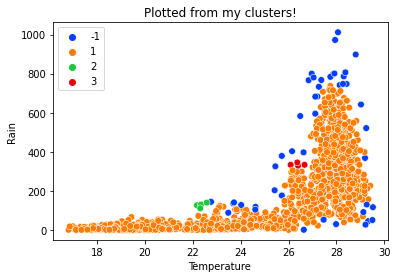

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


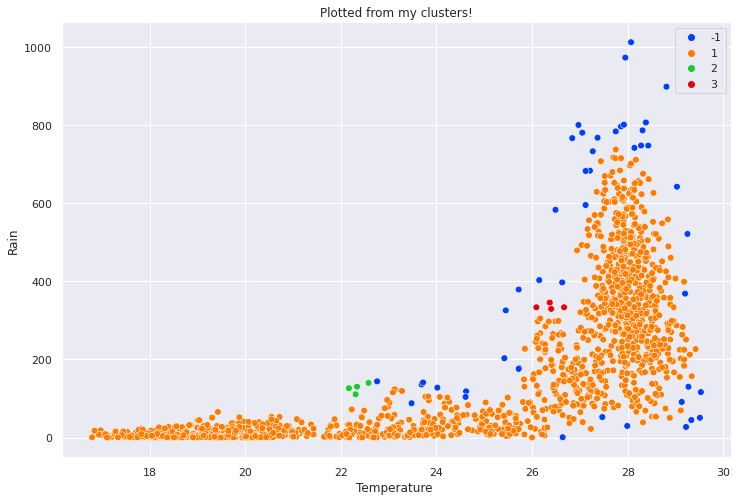

In [ ]:
import seaborn as sns
sns.scatterplot(data.iloc[:, 2], data.iloc[:, 3], 
                hue=clusters, palette='bright',s=45)
sns.set(rc={'figure.figsize':(12,8)})
plt.title('Plotted from my clusters!')
plt.show();